## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


In [3]:
np.unique(wine.target, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48], dtype=int64))

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred):.3f}")

Accuracy = 0.889


In [5]:
def get_best_model_and_accuracy(model, params, X, y):
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(model, params, cv=5, error_score=0, n_jobs=-1,iid=False)
    grid.fit(X, y)
    print(f"Best accuracy: {grid.best_score_}")
    print(f"Best params: {grid.best_params_}")
    print(f"Average time to fit (s): {grid.cv_results_['mean_fit_time'].mean():.3f}")
    print(f"Average time to score (s): {grid.cv_results_['mean_score_time'].mean():.3f}")

In [6]:
from sklearn.pipeline import Pipeline

clf = DecisionTreeClassifier()

pipeline = Pipeline([('clf', clf)])
params = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [2, 5, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [2, 5, 10],
}
get_best_model_and_accuracy(pipeline, params, X, y)

Best accuracy: 0.9283697983697984
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 5}
Average time to fit (s): 0.001
Average time to score (s): 0.000


Accuracy = 0.956


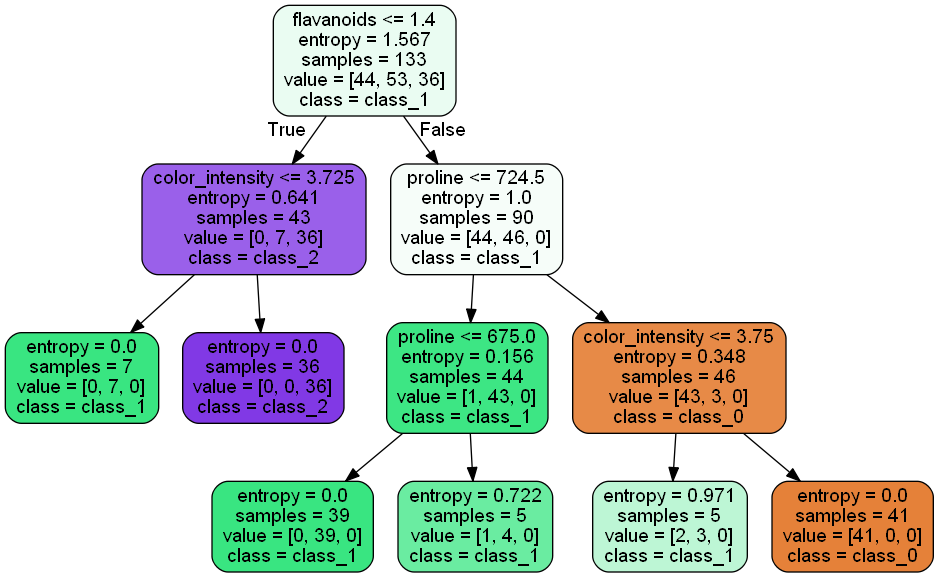

In [7]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5, min_samples_leaf=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred):.3f}")

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(
    clf, 
    filled=True,
    rounded=True,
    class_names=wine.target_names,
    feature_names=wine.feature_names,
    out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

from IPython.display import Image
Image(filename = 'tree.png', width=500)